# Exploratory data analysis on haberman Survival Dataset

## Dataset Description :- https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival
    
#### Dataset contains the data of patients age, operation year, positive auxiallry, Survival Status nodes having breast cancer.
#### Survival Status :- 
#### 1 =  if Patient survived 5 years or longer
####  2 = if Patient died under 5 years


### OBJECTIVE :- 
#### To classify the Survival status based on the features availaible in the dataset(i.e Age, operation_year, Positive_auxilary_node)

 

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
column = ['Age','Year_of_Operation','Positive_Axillary_Nodes','Survival_Status']
data = pd.read_csv('haberman.csv', names = column)

In [63]:
data

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [64]:
data.head()

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [65]:
type(data)

pandas.core.frame.DataFrame

In [66]:
print(data.shape)

(306, 4)


In [67]:
print(data.columns)

Index(['Age', 'Year_of_Operation', 'Positive_Axillary_Nodes',
       'Survival_Status'],
      dtype='object')


In [68]:
type(data.columns)

pandas.core.indexes.base.Index

In [69]:
data["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

## Observation:-

1 = 225/306*100 = 73.5%
2 = 81/306*100 = 26.47%

73% of the points are of Survived people i.e class 1
26% of the points are of died people i.e of class 2

So, it is the case of unbalanced dataset since survival status 1(survived 5 years or more) have 225 data points and survival status 2(died within 5 years) have 81 data points so, it makes somewhat difficult to classify

In [70]:
data.describe()

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [71]:
survived_person = data.loc[data["Survival_Status"]==1]
survived_person.describe()

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [72]:
died_person = data.loc[data["Survival_Status"]==2]
died_person.describe()

,Age,Year_of_Operation,Positive_Axillary_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [73]:
# Survived if Survival_Status = 1
# Died if Survival_Status = 2 or other 
data["Survival_Status"] = data["Survival_Status"].apply(lambda x: "Survived" if x == 1 else "Died")

# 2D Scatter Plot

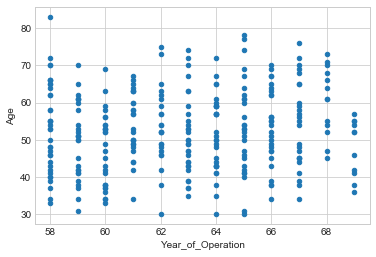

In [74]:
# Plotting by taking 2 features at a time
data.plot(kind='scatter', x='Year_of_Operation', y='Age')
plt.show()

## OBSERVATION :- 
 Difficult to classify since we are not able to diffentiate betwwen the two classes 

## Now, Plotting by classifying classes differently

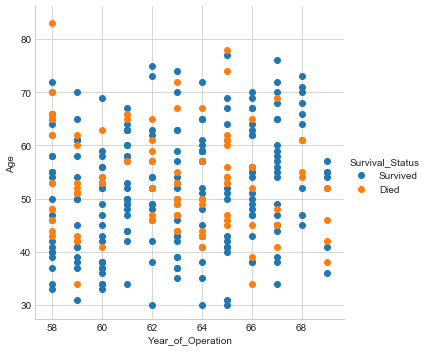

In [75]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(plt.scatter, "Year_of_Operation", "Age") \
   .add_legend();
plt.show();

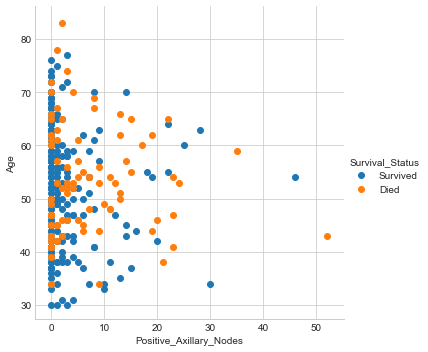

In [76]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(plt.scatter, "Positive_Axillary_Nodes", "Age") \
   .add_legend();
plt.show();

Note :- By adding legend the three classes are more separable and visible now

# Pair plot 
## Can be used when number of features are high
### NOTE: The diagnol elements are the respective PDFs for each feature. 
 

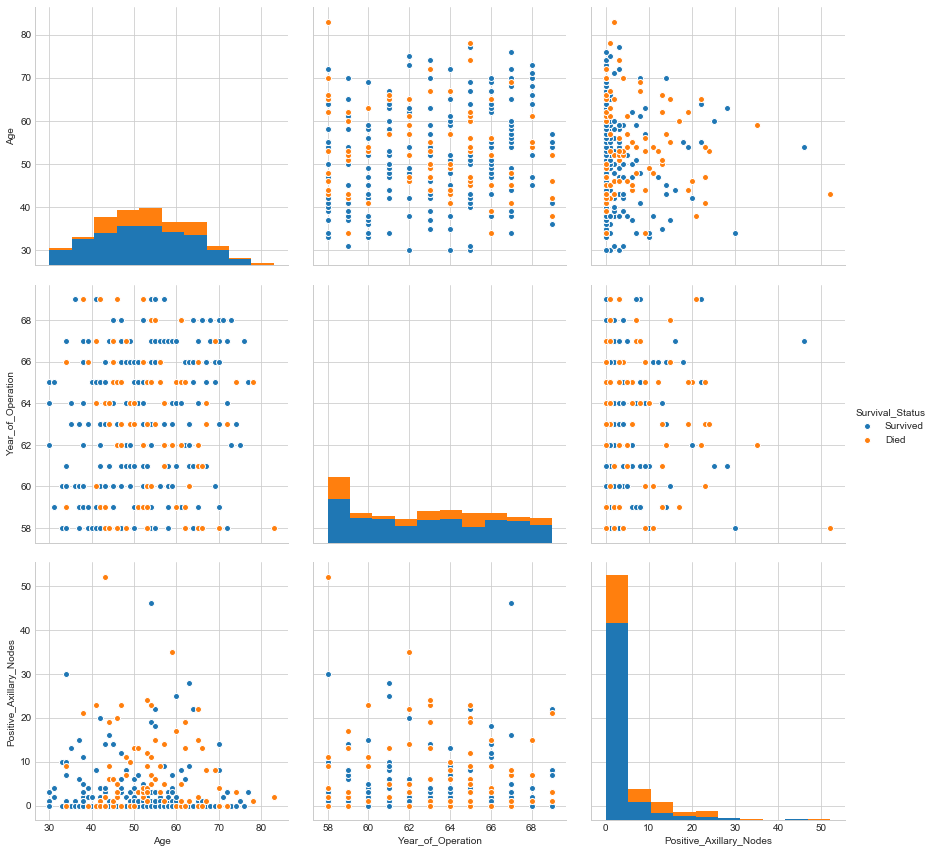

In [77]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Survival_Status",size=4);
plt.show();

# Observation
##### 1) Here by seeing the above pair plot we are not able to diffentiate between the classes
##### 2) The Data points are overlapping so it is very difficult to differentiate between the classes
##### 3) This maybe due to because of the unbalanced dataset of the classes
##### 4) Now, we have to try more possible plots to view if we are able to classify or not

# UNIVARIATE ANALYSIS
1-D scatter plot using just one feature


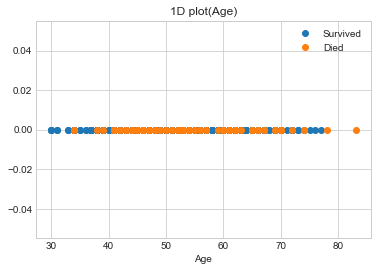

In [80]:
# 1-D scatter plot of AGE

data_Survived = data.loc[data["Survival_Status"] == "Survived"];
data_Died = data.loc[data["Survival_Status"] == "Died"];

plt.plot(data_Survived["Age"], np.zeros_like(data_Survived['Age']), 'o')
plt.plot(data_Died["Age"], np.zeros_like(data_Died['Age']), 'o')
plt.legend(['Survived','Died'])
plt.xlabel('Age')
plt.title('1D plot(Age)')

plt.show()

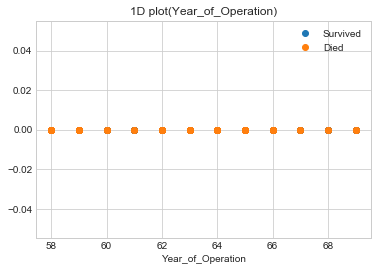

In [79]:
# 1-D scatter plot of Year_of_operation

data_Survived = data.loc[data["Survival_Status"] == "Survived"];
data_Died = data.loc[data["Survival_Status"] == "Died"];

plt.plot(data_Survived["Year_of_Operation"], np.zeros_like(data_Survived['Year_of_Operation']), 'o')
plt.plot(data_Died["Year_of_Operation"], np.zeros_like(data_Died['Year_of_Operation']), 'o')
plt.legend(['Survived','Died'])
plt.xlabel('Year_of_Operation')
plt.title('1D plot(Year_of_Operation)')

plt.show()

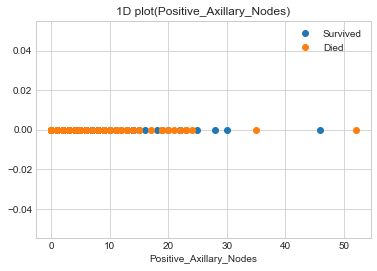

In [23]:
# 1-D scatter plot of Positive_Axillary_Nodes
data_Survived = data.loc[data["Survival_Status"] == "Survived"];
data_Died = data.loc[data["Survival_Status"] == "Died"];

plt.plot(data_Survived["Positive_Axillary_Nodes"], np.zeros_like(data_Survived['Positive_Axillary_Nodes']), 'o')
plt.plot(data_Died["Positive_Axillary_Nodes"], np.zeros_like(data_Died['Positive_Axillary_Nodes']), 'o')
plt.legend(['Survived','Died'])
plt.xlabel('Positive_Axillary_Nodes')
plt.title('1D plot(Positive_Axillary_Nodes)')

plt.show()

# Histogram Plot
### Plotting by taking one feature at a time

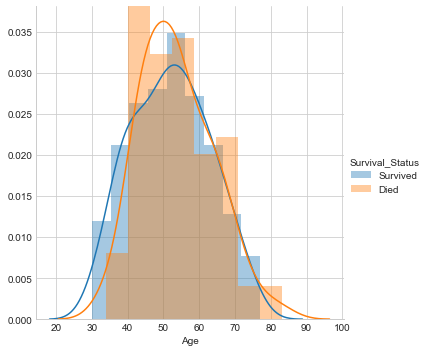

In [81]:
# AGE
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();
    

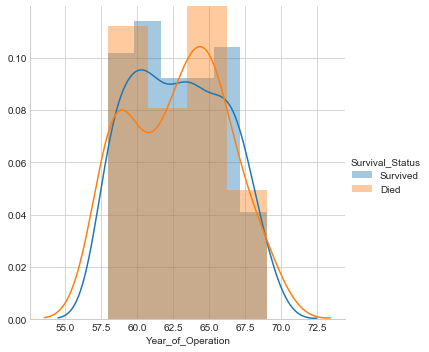

In [82]:
# Year_of_Operation
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Year_of_Operation") \
   .add_legend();
plt.show();

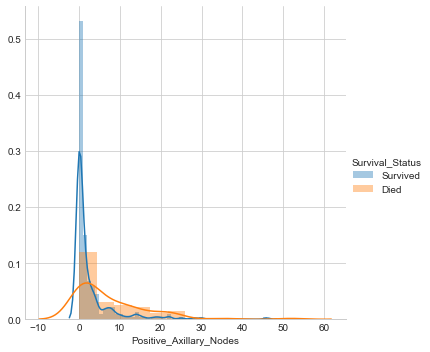

In [83]:
# Positive_Axillary_Nodes
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Positive_Axillary_Nodes") \
   .add_legend();
plt.show();

# Observation
#### 1)  As it is clearly visible that the plots are overlaping and it is extremely difficult to differentiate between the data points
#### 2) When we are plotting by taking positive auxillary nodes then we are able to clarify that the patients having higher the positive auxillary nodes will have lesser chances of survival
#### 3) But we cannot say clearyly because still we are not able to diffentitae betweeen then because of the overlapping histogram

# PDF and CDF
## Probability distribution Function
## Cummulative distribution function

#### Now plotting CDF(cummulative distributive function) and PDF(Probability Density function) to visualize what percentage
#### of dataset is under a limit so that if we classify the class then most of the points are seperable or not
#### Let say we have to know what percentage of datapoints of Positive_auxillary_nodes is under 10 then we have to use CDF

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


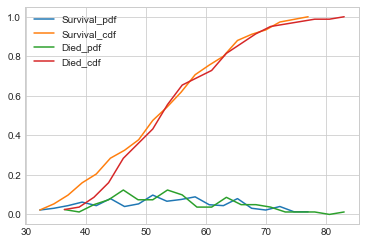

In [43]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

## Age

#survived
counts, bin_edges = np.histogram(data_Survived['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# dies
counts, bin_edges = np.histogram(data_Died['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survival_pdf', 'Survival_cdf','Died_pdf', 'Died_cdf'])

plt.show();

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


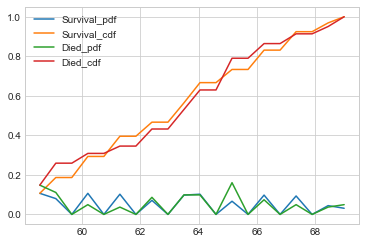

In [42]:
counts, bin_edges = np.histogram(data_Survived['Year_of_Operation'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# dies
counts, bin_edges = np.histogram(data_Died['Year_of_Operation'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survival_pdf', 'Survival_cdf','Died_pdf', 'Died_cdf'])


plt.show();

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


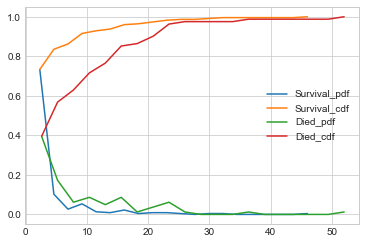

In [41]:
counts, bin_edges = np.histogram(data_Survived['Positive_Axillary_Nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# dies
counts, bin_edges = np.histogram(data_Died['Positive_Axillary_Nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survival_pdf', 'Survival_cdf','Died_pdf', 'Died_cdf'])

plt.show();

In [58]:
data["Survival_Status"]=data["Survival_Status"].apply(lambda x: 1 if x == "Survived" else 2)

# Box Plot


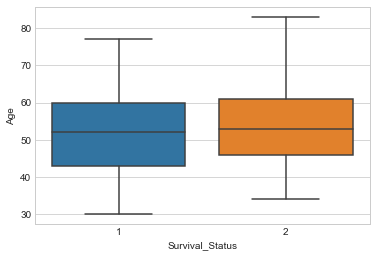

In [46]:
sns.boxplot(x='Survival_Status', y='Age', data=data)
plt.show()


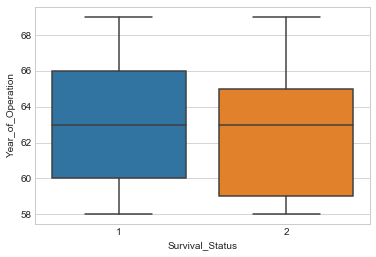

In [47]:
sns.boxplot(x='Survival_Status', y='Year_of_Operation', data=data)
plt.show()


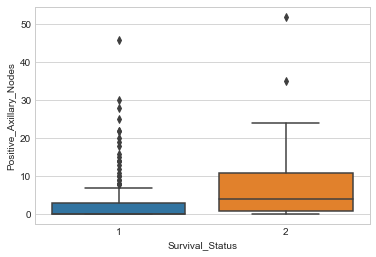

In [48]:
sns.boxplot(x='Survival_Status', y='Positive_Axillary_Nodes', data=data)
plt.show()


# Violen plot

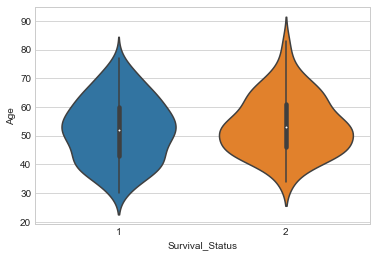

In [49]:
sns.violinplot(x="Survival_Status", y="Age", data=data, size=8)
plt.show()

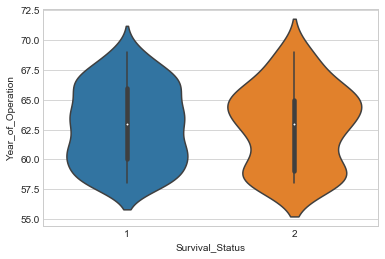

In [50]:
sns.violinplot(x="Survival_Status", y="Year_of_Operation", data=data, size=8)
plt.show()

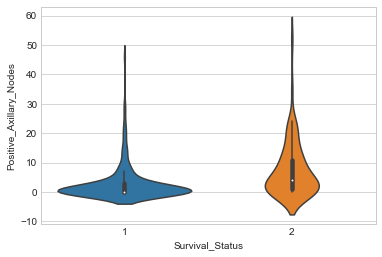

In [51]:
sns.violinplot(x="Survival_Status", y="Positive_Axillary_Nodes", data=data, size=8)
plt.show()

# Contour Plot

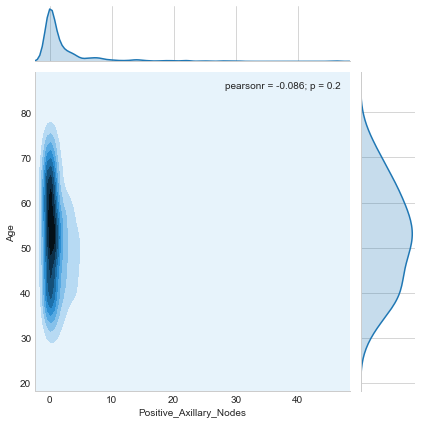

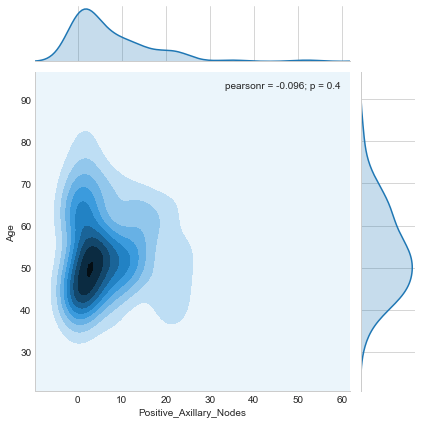

In [54]:
sns.jointplot(x="Positive_Axillary_Nodes", y="Age", data = data_Survived , kind="kde");
plt.show();

sns.jointplot(x="Positive_Axillary_Nodes", y="Age", data = data_Died , kind="kde");
plt.show();

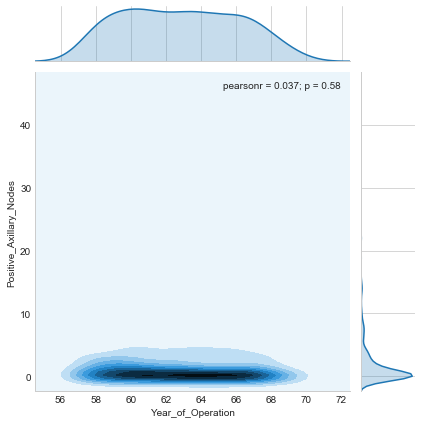

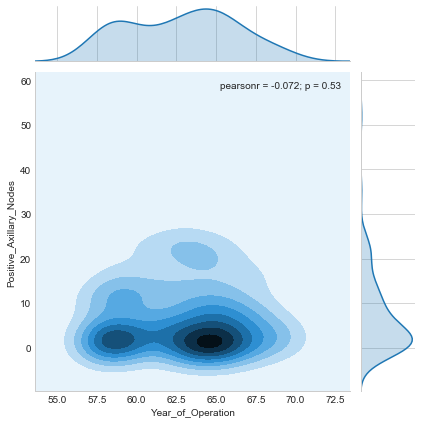

In [56]:
sns.jointplot(x="Year_of_Operation", y="Positive_Axillary_Nodes", data = data_Survived , kind="kde");
plt.show();

sns.jointplot(x="Year_of_Operation", y="Positive_Axillary_Nodes", data = data_Died , kind="kde");
plt.show();